# Movie Recommendation System
## Team_ZM3_DSFT2021

<img src="https://miro.medium.com/max/4000/1*gnFCUs-ZbhCSMvCi7ur4ow.png" alt="Movix.ai — movie recommendations with Deep Learning | by Supervise.ly |  Supervisely | Medium" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="width: 433px; height: 237.067px; margin: 13.6163px 0px;">

# Table of Contents

1. **Introduction**

2. **Load libraries and Data**

3. **Data Preprocessing**

4. **Exploratory Data Analysis**

5. **Modeling**

6. **Performance Evaluation**

7. **Best Model Hyperparameter Tuning**

8. **Submission**

9. **Conclusion**


# 1: Introduction
When was the last time you watched a movie on a online streaming platform like Netflix? After some time, that platform started recommending different movies and TV shows to you. 

I was wondering, how the platform could suggest movies I liked. This is an example of a Recommendation System. This system is capable of learning your watching patterns and providing the person with relevant suggestions. Artificial intelligence and other technologies are dominating the market, I am sure that you must have come across a recommendation system in your everyday life.

The financial benefits of a recommendation system are enormous and almost every major tech company has applied them in some form or the other.

<img src="https://media2.giphy.com/media/7zMsa4CDcXY7PEDNGN/giphy.gif" alt="Movie Night GIFs - Get the best GIF on GIPHY" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="width: 410px; height: 410px; margin: 0px;">

### Background and Predict Objective

 - In today’s technology-driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with daily. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

 - Team_ZM3 has been challenged to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

 - The current recommendation systems that are being used and are popular are content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations. 

 1. **Content-based filtering (CBF)**:  Makes recommendations based on user preferences for product features.
 2. **Collaborative filtering (CF)**:  Mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). It predicts users preferences as a linear, weighted combination of other user preferences.

 - We have to note that both of these methods have limitations: The CBF can recommend a new item but needs more data on user preferences to give out the best match. On the other hand, the CF requires a large dataset with active users who rated the product before to make the most accurate predictions. The combination of both of these methods is known as hybrid recommendation systems.

# 2: Load libraries and Data

In [ ]:
!pip install surprise
!pip install comet-ml
!pip install CurrencyConverter 
!pip intsall wordcloud

     |████████████████████████████████| 11.8 MB 46 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617773 sha256=c46c329798b50959282922a9e113815c4c56af64e51dad3c1b449739dcbbac97
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise
     |████████████████████████████████| 276 kB 9.5 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 529 kB 12.5 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=365fbddc500e925ab35d4a1eab1f9b63c0a7bde2a1654a6ee9dfa9956edc4abb
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
     |████████████████████████████████| 526 kB 7.4 MB/s 
ERROR: unknown command "intsall" - maybe you

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="5WsQoolzg4OSp5FT6QUPvy8Y3",
    project_name="unsupervised-zm3",
    workspace="stefanferreira94",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/stefanferreira94/unsupervised-zm3/1de5b3e1738e46a9ad4c49d31d2df4f0



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/




### Running our input directory to see all files available for this predict on Kaggle.

In [ ]:

'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Installing packages


In [ ]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)

## Reading in data

**Supplied Files**
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- IMDB_extra.csv - Additional movie metadata. This dataset was specfically used in order to attain the correct entries for the movie directors.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [ ]:
df_sample_submission = pd.read_csv('/content/drive/My Drive/ColabNotebooks/sample_submission.csv')
df_movies = pd.read_csv('/content/drive/My Drive/ColabNotebooks/movies.csv')
df_imdb = pd.read_csv('/content/drive/My Drive/ColabNotebooks/imdb_data.csv')
df_genome_scores = pd.read_csv('/content/drive/My Drive/ColabNotebooks/genome_scores.csv')
df_genome_tags = pd.read_csv('/content/drive/My Drive/ColabNotebooks/genome_tags.csv')
df_train = pd.read_csv('/content/drive/My Drive/ColabNotebooks/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/ColabNotebooks/test.csv')
df_tags = pd.read_csv('/content/drive/My Drive/ColabNotebooks/tags.csv')
df_links = pd.read_csv('/content/drive/My Drive/ColabNotebooks/links.csv')

#### Below looking at our extra data and viewing our datasets given for this project.

We downloaded an extensive movies dataset to supplement our directors column, as many of the directors were authors instead of directors. So we joined the df_links to the extra dataset and then joined that to our IMDB dataset as a new column, called correct_directors.

In [ ]:
df_extra_imdb = pd.read_csv('/content/drive/My Drive/ColabNotebooks/IMDB_extra.csv')

In [ ]:
df_extra_imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
df_sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


# 3: Data Pre-processing

We did some pre-processing like:
-  getting the correct director
-  joining certain datasets
-  getting the relevancy scores of higher tags
- changing years to decades
- turning budget columns into one currency
- dropping redundant data
- removing nan value data and dropping empty rows
- and much more ...

In [ ]:
#Prepare the imdb titel id to link to our movies dataframe to get the correct director
df_extra_imdb['imdb_title_id'] = df_extra_imdb['imdb_title_id'].str.replace('tt','').astype(int)
df_extra_imdb['correct_director'] = df_extra_imdb['director']
df_extra_imdb['imdbId'] = df_extra_imdb['imdb_title_id']

#Join links df to extra imdb df
temp = pd.merge(df_links, df_extra_imdb[['imdbId', 'correct_director']], how = 'left', on  = 'imdbId')
df_imdb = pd.merge(df_imdb, temp[['movieId', 'correct_director']], how = 'left', on  = 'movieId')

In [ ]:
#Using genome tags with a relevance score larger than 0.7 to only get the most relevant tags
df_genome_scores_cust = df_genome_scores[df_genome_scores['relevance'] > 0.7]
df_genome_scores_cust = pd.merge(df_genome_scores_cust,df_genome_tags,on='tagId')
df_genome_scores_cust = df_genome_scores_cust.drop(columns = ['tagId', 'relevance'])
df_genome_scores_cust['tag'] = df_genome_scores_cust['tag'].str.replace(' ','_')
df_genome_scores_cust['tag'] = df_genome_scores_cust['tag'] + ' '
df_genome_scores_cust = df_genome_scores_cust.groupby(by = 'movieId').sum()
df_genome_scores_cust['g_tag'] = df_genome_scores_cust['tag']
df_genome_scores_cust.drop(columns = 'tag', inplace = True)

In [ ]:
#Prepare tags dataframe
df_tags_cust = df_tags.drop(columns = ['userId', 'timestamp'])
df_tags_cust['tag'] = df_tags_cust['tag'].str.replace(' ', '_')
df_tags_cust['tag'] = df_tags_cust['tag'] + ' '
df_tags_cust = df_tags_cust.groupby(by = 'movieId').sum()
df_tags_cust.reset_index(level=0, inplace=True)

In [ ]:
#Merge dfs to create more data to build features from
df_movie_imdb = pd.merge(df_movies,df_imdb,on='movieId',how='inner')
df_movie_imdb_tags = pd.merge(df_movie_imdb,df_tags_cust,on='movieId',how='outer')
df_movie_imdb_tags = pd.merge(df_movie_imdb_tags,df_genome_scores_cust,on='movieId',how = 'outer')

#Let's drop the movies which have no title
df_movie_imdb_tags = df_movie_imdb_tags[df_movie_imdb_tags['title'].notna()]

#Split year from title and remove parentheses
df_movie_imdb_tags['year'] = df_movie_imdb_tags['title'].str[-6:]
df_movie_imdb_tags['year'] = df_movie_imdb_tags['year'].str.replace(r"(","")
df_movie_imdb_tags['year'] = df_movie_imdb_tags['year'].str.replace(r")","")
#df_movie_imdb_tags['title'] = df_movie_imdb_tags['title'].str[:-7]

#Make decade column
df_movie_imdb_tags['decade'] = df_movie_imdb_tags['year'].str[:-1] + '0s'

#Fix 'no genres listed
df_movie_imdb_tags['genres'] = df_movie_imdb_tags['genres'].replace("(no genres listed)",np.nan)

#Drop columns which have NaN in 'genres',	'title_cast',	'director',	'runtime',	'budget',	'plot_keywords',	'tag'
#df_movie_imdb_tags = df_movie_imdb_tags.dropna(axis=0, subset=['genres',	'title_cast',	'director',	'runtime',	'budget',	'plot_keywords',	'tag'], how = 'all') 

#We need to get the columns in the correct format however so we replace | with a space, and spaces with commas
df_movie_imdb_tags['title_cast'] = df_movie_imdb_tags['title_cast'].str.replace(' ', '_')
df_movie_imdb_tags['title_cast'] = df_movie_imdb_tags['title_cast'].str.replace('|', ' ')

df_movie_imdb_tags['director'] = df_movie_imdb_tags['director'].str.replace(' ', '_')

df_movie_imdb_tags['plot_keywords'] = df_movie_imdb_tags['plot_keywords'].str.replace(' ', '_')
df_movie_imdb_tags['plot_keywords'] = df_movie_imdb_tags['plot_keywords'].str.replace('|', ' ')

df_movie_imdb_tags['genres'] = df_movie_imdb_tags['genres'].str.replace(' ', '_')
df_movie_imdb_tags['genres'] = df_movie_imdb_tags['genres'].str.replace('|', ' ')

#We also replace null values with a blank
df_movie_imdb_tags = df_movie_imdb_tags.fillna('')

#Creating a year column using title column
df_movie_imdb_tags['year'] = df_movie_imdb_tags['title'].str[-6:]
df_movie_imdb_tags['year'] = df_movie_imdb_tags['year'].str.replace(r"(", "")
df_movie_imdb_tags['year'] = df_movie_imdb_tags['year'].str.replace(r")", "")

#Now to use the year values to create a decade column
df_movie_imdb_tags['decade'] = df_movie_imdb_tags['year'].str[:3] + "0s"

#Creating currency column and cleaning budget column
df_movie_imdb_tags['budget'] = df_movie_imdb_tags['budget'].str.replace(r'$', 'USD')
df_movie_imdb_tags['currency'] = df_movie_imdb_tags['budget'].str.extract(r'([a-zA-Z]*)')
df_movie_imdb_tags['budget'] = df_movie_imdb_tags['budget'].str.replace(r'[a-zA-Z]', '')
df_movie_imdb_tags['budget'] = df_movie_imdb_tags['budget'].str.replace(',', '')

In [ ]:
#Importing the CurrencyConverter function and converting the budget column so that each budget value is in USD:
from currency_converter import CurrencyConverter

c= CurrencyConverter()
currencies = list(c.currencies)
currency_match = []
for curr in df_movie_imdb_tags['currency']:
  if curr in currencies:
    currency_match.append(curr)

  else:
    curr = 'USD'
    currency_match.append(curr)
df_movie_imdb_tags['currency'] = currency_match

#Now doing the conversion using the exchange rates provided by CurrencyConverter:
exchange_rate = []
for curr in df_movie_imdb_tags['currency']:
  rate = c.convert(1, curr, 'USD')
  exchange_rate.append(rate)
df_movie_imdb_tags['exchange_rate'] = exchange_rate

#Attaining the budget in USD: 'budget_USD':
df_movie_imdb_tags['budget'] = pd.to_numeric(df_movie_imdb_tags['budget'], errors='coerce')
df_movie_imdb_tags['budget_USD'] = df_movie_imdb_tags['budget']*df_movie_imdb_tags['exchange_rate']


In [ ]:
#Splitting the genres column so that each row contains only one genre.
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres = pd.merge(movies_genres, df_movie_imdb_tags[['movieId', 'budget_USD', 'decade', 'correct_director']], on='movieId', how='inner')

movies_genres.head()

,movieId,genres,budget_USD,decade,correct_director
0,1,Adventure,30000000.0,1990s,John Lasseter
1,1,Animation,30000000.0,1990s,John Lasseter
2,1,Children,30000000.0,1990s,John Lasseter
3,1,Comedy,30000000.0,1990s,John Lasseter
4,1,Fantasy,30000000.0,1990s,John Lasseter


# 4: Exploratory Data Analysis

[Text(0, 0.5, 'Movie Title'), Text(0.5, 0, 'Movie Rating')]

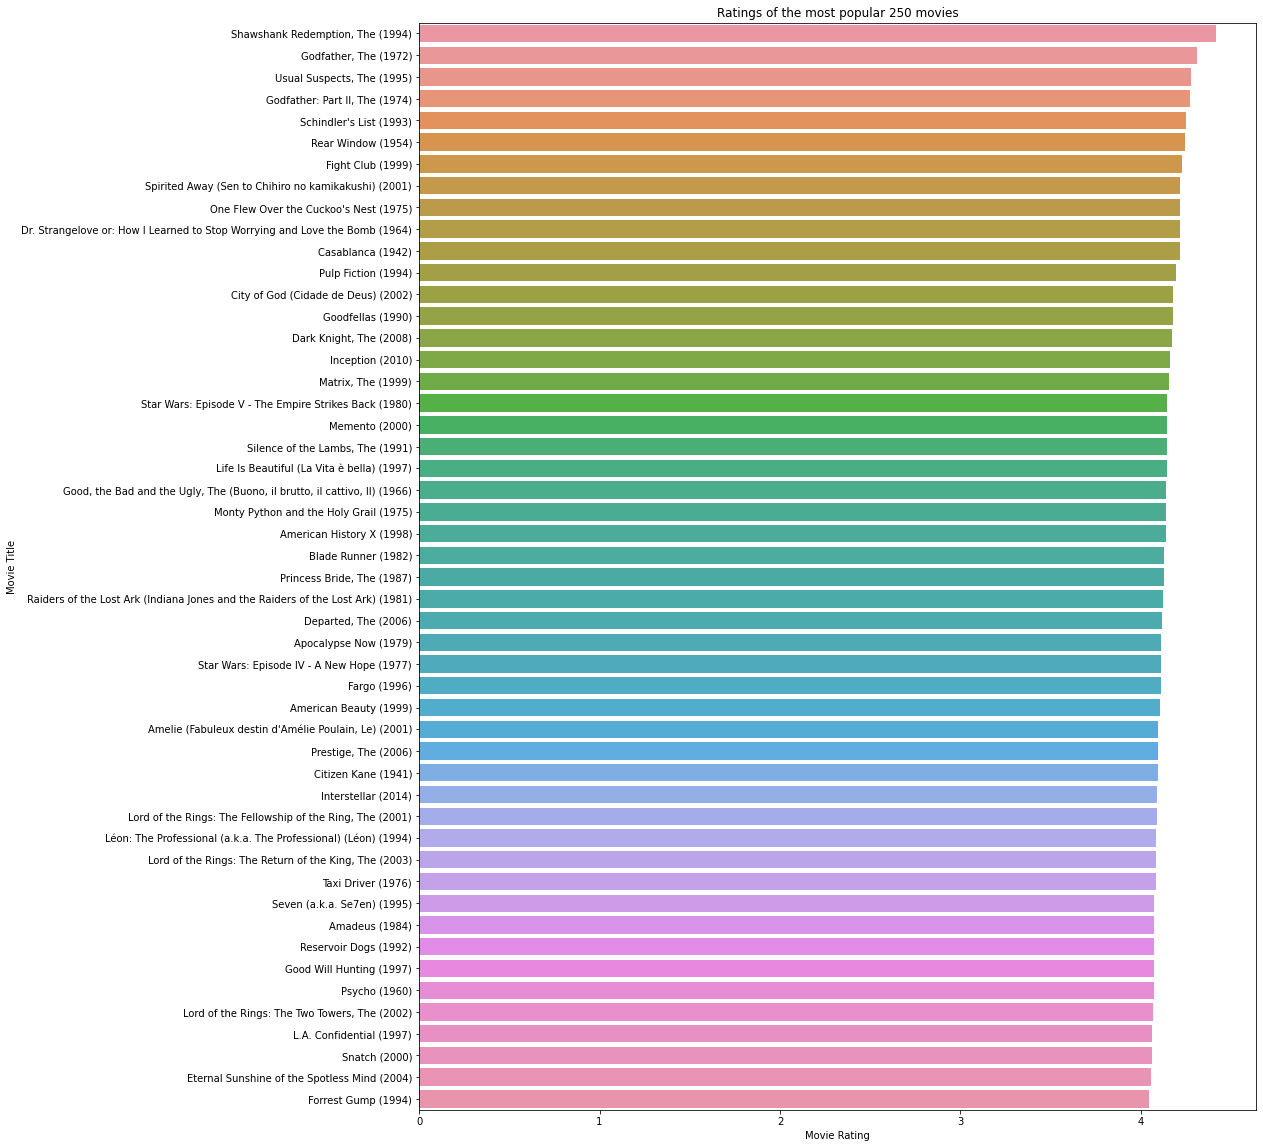

In [ ]:
#Ratings of the 250 most popular movies
ratings_df = df_train.drop(columns = ['userId', 'timestamp'])

#Get the top 250 most popular movies
most_pop_df = ratings_df.groupby(by = ['movieId']).count().sort_values(by = 'rating', ascending = False).head(250)

#Movie IDs of most popular 250 movies
pop250_IDs = list(most_pop_df.index)

#Select only the most popular movies from the ratings df
#This is now the top 250 most popular movies
pop250_df = ratings_df[ratings_df['movieId'].isin(pop250_IDs)]

#Get the top 250 movies average rating
pop250_df = pop250_df.groupby(by = 'movieId').mean()

#Add titles to the pop250
pop250_df = pd.merge(pop250_df, df_movies, how = 'left', on = 'movieId')
pop250_df = pop250_df.drop(columns = ['genres'])

#Top 50 most popular movies rated
plt.figure(figsize=(15,20))
plt.title('Ratings of the most popular 250 movies')
ax = sns.barplot(x = 'rating', y = 'title', data = pop250_df.sort_values(by = 'rating', ascending = False).head(50))
ax.set(xlabel='Movie Rating', ylabel='Movie Title')

* Above we can see the most popular TOP-50 movies out of a list of top 250, ordered in descending rating. It shows us that The Shawshank Redemption is the best movie by the high ratings it received out of all users. 
* One would say that the streaming company would most probably feed this movie in for a lot of users' recommended 'to watch section' that loves this type of movie.

In [ ]:
#Get types of genres in df
df_movies['genres_split'] = df_movies['genres'].str.replace('|', ' ')
df_movies['genres_split'] = df_movies['genres'].str.replace('-', '_')

genres = df_movies['genres_split'].str.lower().str.findall("\w+")

#Make list of genres in the genres_split column
unique_genre = set()

for genre in genres:
    unique_genre.update(genre)

unique_genre = list(unique_genre)

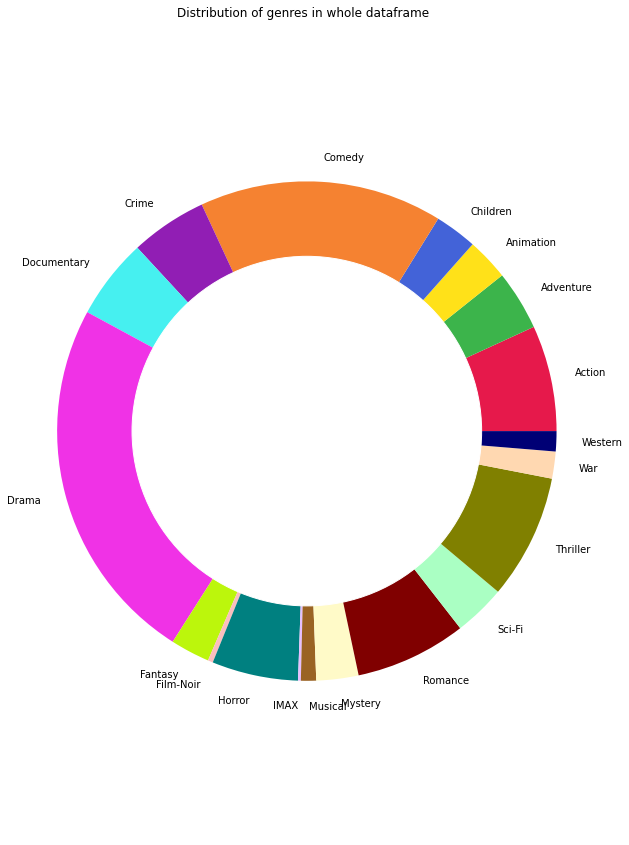

In [ ]:
#Get distribution of genres in the movies_df

#Explode df into different genres
df_movies['genres_split'] = df_movies['genres'].str.replace('|', ' ')
df_movies['genres_split'] = df_movies['genres_split'].replace('(no genres listed)', np.nan)
df_movies['genres_split'] = df_movies['genres_split'].str.split(' ')
df_movies_genre = df_movies.explode('genres_split')
df_movies_genre = df_movies_genre.drop(columns = ['genres'])
df_movies_genre.dropna(inplace = True)

#Set the colours for the donut chart
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

#Create donut chart for distribution of genres in the whole dataframe
df_movies_genre.groupby(by = 'genres_split').count().plot.pie(y = 'movieId',figsize=(10,15), legend = False, colors = colors)
plt.axis('equal')

#add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axes().set_ylabel('')
plt.title('Distribution of genres in whole dataframe')
plt.show()

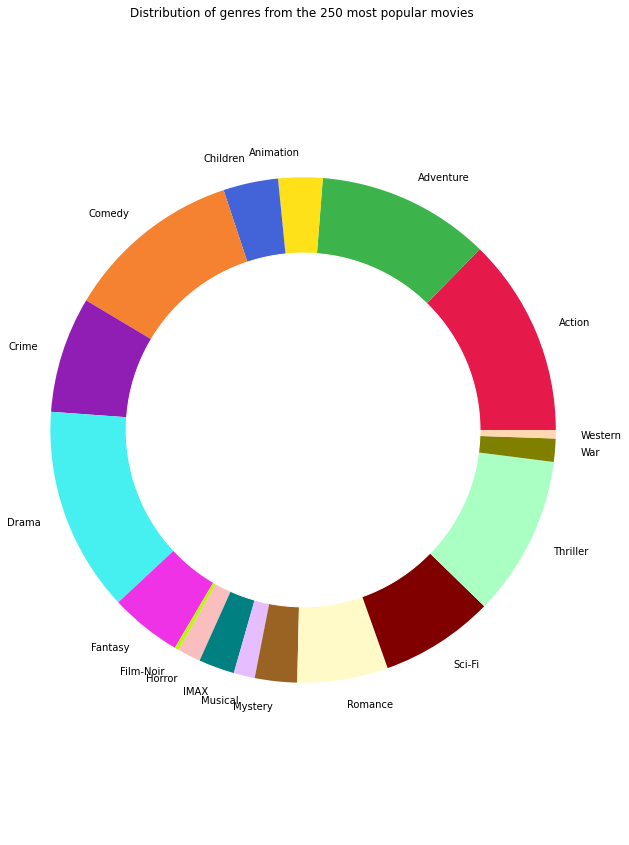

In [ ]:
#Top rated movies for each genre

#Merge pop250 with movies df
pop250_df_genre = pd.merge(pop250_df, df_movies[['genres','movieId']], how = 'left', on = 'movieId')
pop250_df_genre

pop250_df_genre['genres_split'] = pop250_df_genre['genres'].str.replace('|', ' ')
pop250_df_genre['genres_split'] = pop250_df_genre['genres_split'].replace('(no genres listed)', np.nan)
pop250_df_genre['genres_split'] = pop250_df_genre['genres_split'].str.split(' ')
pop250_df_genre = pop250_df_genre.explode('genres_split')
pop250_df_genre = pop250_df_genre.drop(columns = ['genres'])
pop250_df_genre.dropna(inplace = True)

#Create donut chart for distribution of genres in the pop250 dataframe
pop250_df_genre.groupby(by = 'genres_split').count().plot.pie(y = 'movieId', figsize=(10,15), legend = False, colors = colors)

#Add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.axes().set_ylabel('')
plt.title('Distribution of genres from the 250 most popular movies')
plt.axis('equal')
plt.show()

* One would expect that movies with a high number of ratings have also gathered a high number of views.
* It is clear looking at the two donut charts that Comedy, Drama and Action have the highest number of ratings and therefore views, it is therefore advisable to commission more of these genres of movies to increase viewership which in turn will increase revenue.
* Even in the Top-250 movies, the most popular genres are in line with the overall sentiment.


[Text(0, 0.5, 'Actor Name'), Text(0.5, 0, 'Number of movies featured in')]

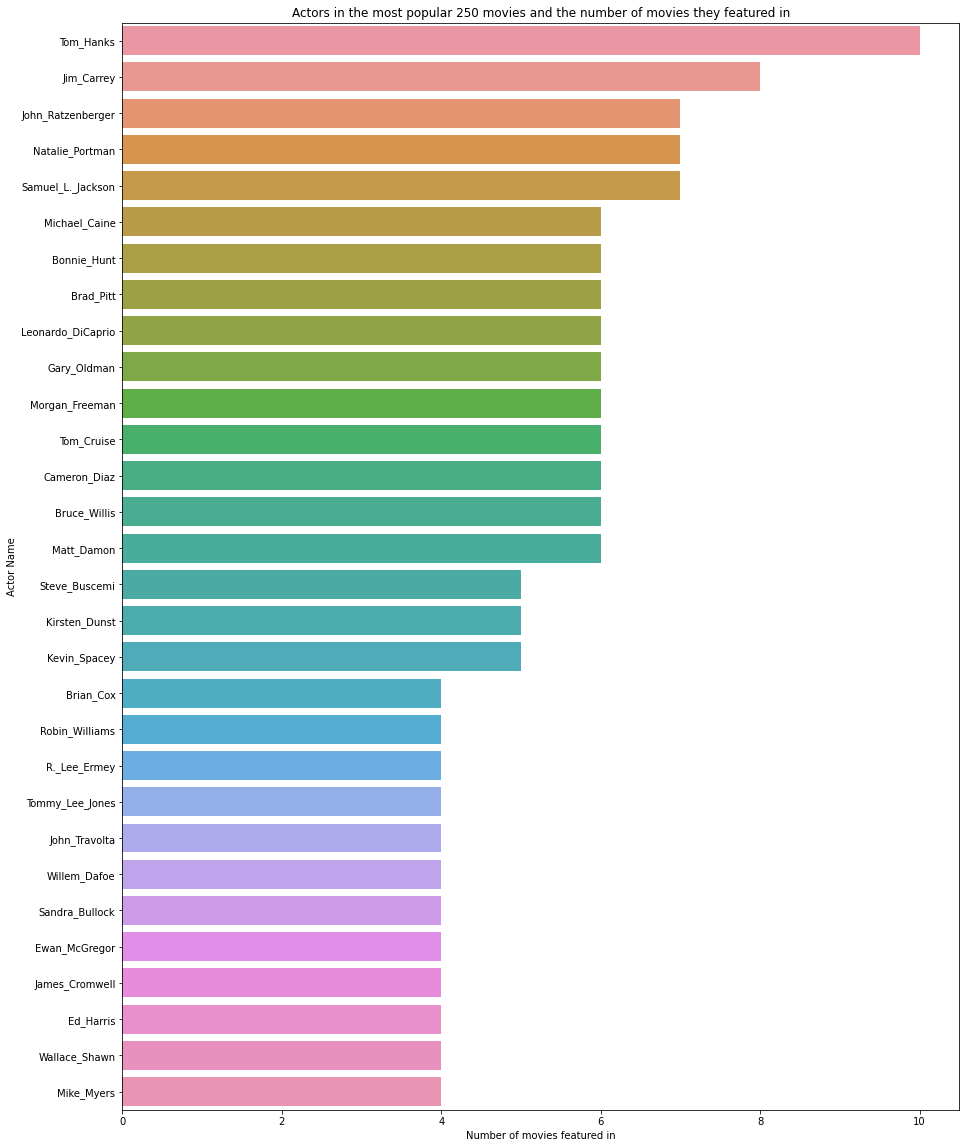

In [ ]:
#Most common actors in the most popular movies
pop250_cast_df = pd.merge(pop250_df, df_imdb[['movieId', 'title_cast']], how = 'left', on = 'movieId')
pop250_cast_df = pop250_cast_df.dropna()
pop250_cast_df['title_cast'] = pop250_cast_df['title_cast'].str.replace(' ', '_')
pop250_cast_df['title_cast'] = pop250_cast_df['title_cast'].str.replace('|', ' ')
pop250_cast_df['title_cast'] = pop250_cast_df['title_cast'].str.split(' ')
pop250_cast_df = pop250_cast_df.explode('title_cast')
pop250_cast_df = pop250_cast_df.groupby(by = ['title_cast']).count().sort_values('title', ascending = False)
pop250_cast_df = pop250_cast_df[['title']]
pop250_cast_df['movie_count'] = pop250_cast_df['title']
pop250_cast_df.drop(columns = ['title'], inplace = True)
pop250_cast_df.reset_index(level=0, inplace=True)

plt.figure(figsize=(15,20))
plt.title('Actors in the most popular 250 movies and the number of movies they featured in')
ax = sns.barplot(x = 'movie_count', y = 'title_cast', data = pop250_cast_df.head(30))
ax.set(xlabel='Number of movies featured in', ylabel='Actor Name')

* In the bar chart above we can see out of the Top-250 most popular movies there are quite a few actors and actresses featuring in more than one movie.
* Tom Hanks takes the number 1 spot and featured in an impressive 10 movies, which concludes him as the overall most used actor for a film.
* One can conclude it would be strongly advisable that the type of films he plays in based on genre would be strongly recommended to users that watch that specific genre. This would in turn increase watch time and therefore increase profit garnered from his top featuring films.

[Text(0, 0.5, 'Director Name'), Text(0.5, 0, 'Number of movies directoed')]

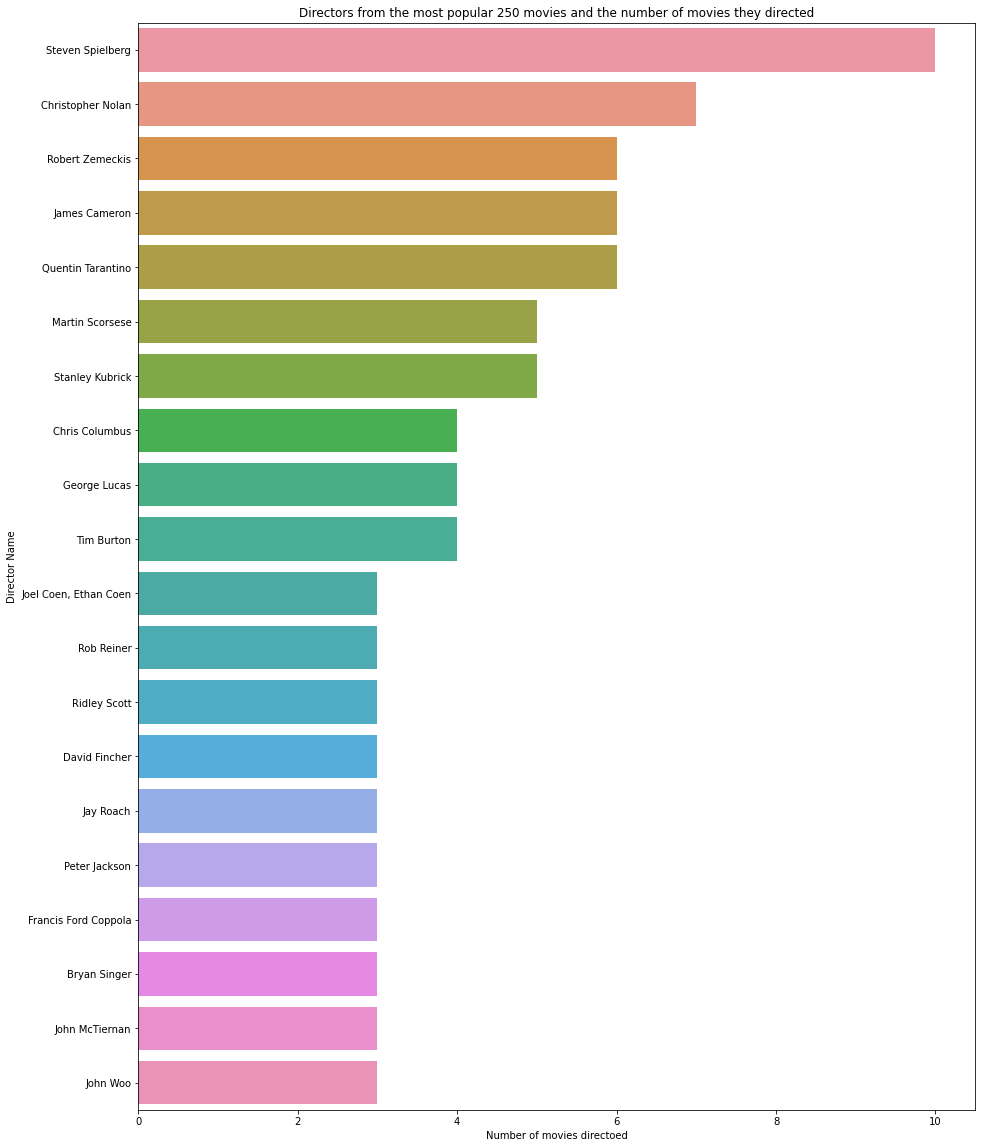

In [ ]:
#Most popular directors
pop250_director_df = pd.merge(pop250_df, df_imdb[['movieId', 'correct_director']], how = 'left', on = 'movieId')
pop250_director_df = pop250_director_df.sort_values(by = 'rating', ascending = False)

#Which directors have the most movies in the top250 most popular
pop250_director_df_count = pop250_director_df.groupby('correct_director').count().reset_index()
pop250_director_df_count = pop250_director_df_count[['correct_director','movieId']]
pop250_director_df_count['movie_count'] = pop250_director_df_count['movieId']
pop250_director_df_count.drop(columns = 'movieId', inplace = True)
pop250_director_df_count['director'] = pop250_director_df_count['correct_director']
pop250_director_df_count.drop(columns = ['correct_director'], inplace = True)
top_20_directors = pop250_director_df_count.sort_values(by = 'movie_count', ascending = False).head(20)

plt.figure(figsize=(15,20))
plt.title('Directors from the most popular 250 movies and the number of movies they directed')
ax = sns.barplot(x = 'movie_count', y = 'director', data = top_20_directors)
ax.set(xlabel='Number of movies directoed', ylabel='Director Name')

In [ ]:
df_movie_imdb_tags['director'] = df_movie_imdb_tags['correct_director'] 

top_20_directors['director'] = top_20_directors['director'].str.replace(' ', '_')
top_20_directors_list = list(top_20_directors['director'])

#Get IMDB data for top 20 directors
df_movie_imdb_tags['director'] = df_movie_imdb_tags['director'].str.replace(' ', '_')

director_movies = df_movie_imdb_tags[df_movie_imdb_tags['director'].isin(top_20_directors_list)]

#List of pop250 movies
pop250_list = list(pop250_df['movieId'])

#Get only the top250 movies from the top 20 directors
pop_director_pop_movies = director_movies[director_movies['movieId'].isin(pop250_list)]

#Add genre, keywords, tags and genome tags together for wordcloud

def combine_features(row):
 return    row['plot_keywords']+ ' ' + row['genres'] + ' ' + row['g_tag'] + ' ' 

#Make new column with combined features
pop_director_pop_movies['combined_features'] = pop_director_pop_movies.apply(combine_features,axis=1)

pop_director_pop_movies = pop_director_pop_movies[['director','combined_features']]

pop_director_pop_movies = pop_director_pop_movies.groupby(by = 'director').sum()

### Wordclouds for some directors in the top 250 most popular movies
Wordclouds are made up from genre, plot keywords and genome tags with a relevance score higher than 0.7.

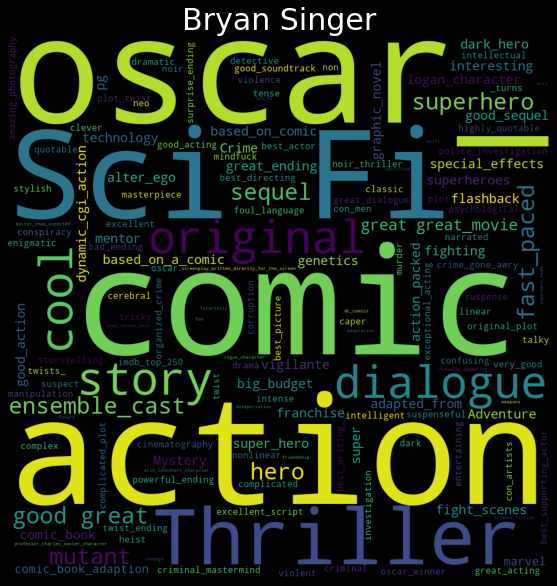

In [ ]:
BryanSinger = ' '.join(pop_director_pop_movies.loc['Bryan_Singer', 'combined_features'].split(' '))
BryanSingerwordcloud = WordCloud( width=1000, height=1000).generate(BryanSinger)

#Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.title('Bryan Singer', fontsize=30, color= 'white')
plt.imshow(BryanSingerwordcloud)
plt.axis("off")
plt.show()

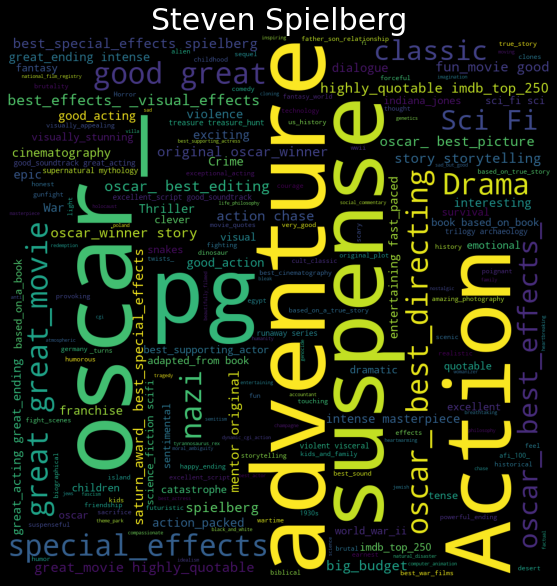

In [ ]:
StevenSpielberg = ' '.join(pop_director_pop_movies.loc['Steven_Spielberg', 'combined_features'].split(' '))
StevenSpielbergwordcloud = WordCloud(width=1000, height=1000).generate(StevenSpielberg)

#Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.title('Steven Spielberg', fontsize=30, color= 'white')
plt.imshow(StevenSpielbergwordcloud)
plt.axis("off")
plt.show()

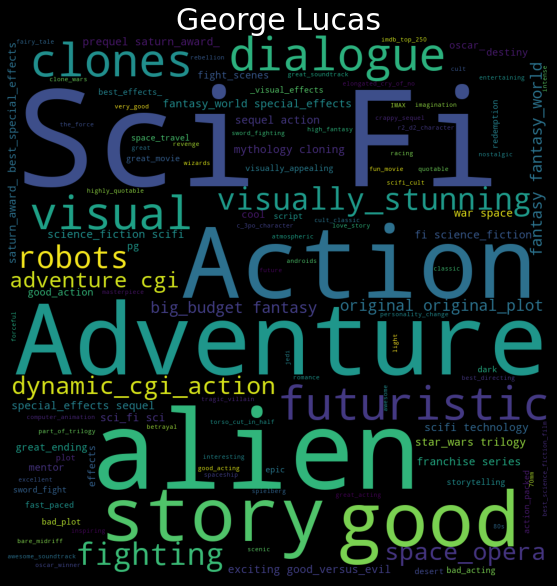

In [ ]:
GeorgeLucas = ' '.join(pop_director_pop_movies.loc['George_Lucas', 'combined_features'].split(' '))
GeorgeLucaswordcloud = WordCloud( width=1000, height=1000).generate(GeorgeLucas)

#Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.title('George Lucas', fontsize=30, color= 'white')
plt.imshow(GeorgeLucaswordcloud)
plt.axis("off")
plt.show()

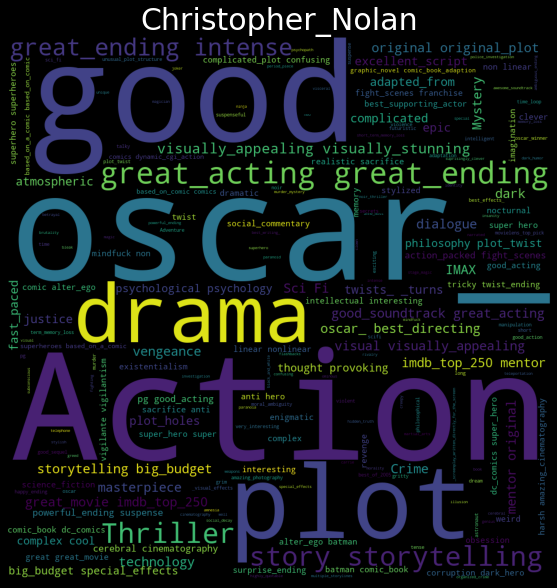

In [ ]:
ChrisNolan = ' '.join(pop_director_pop_movies.loc['Christopher_Nolan', 'combined_features'].split(' '))
ChrisNolanwordcloud = WordCloud( width=1000, height=1000).generate(ChrisNolan)

#Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.title('Christopher_Nolan', fontsize=30, color= 'white')
plt.imshow(ChrisNolanwordcloud)
plt.axis("off")
plt.show()

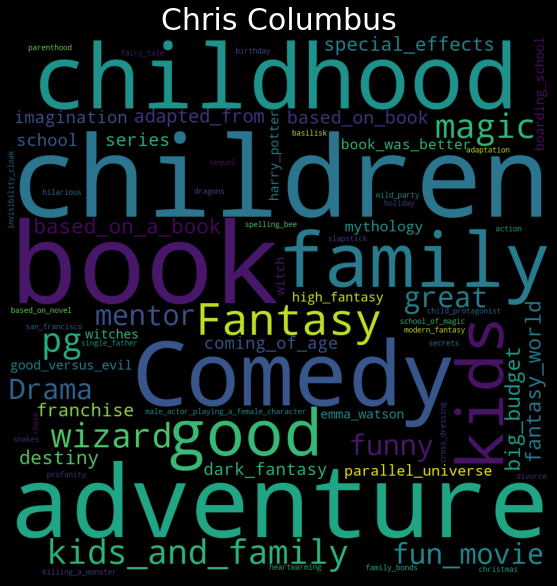

In [ ]:
ChrisColumbus = ' '.join(pop_director_pop_movies.loc['Chris_Columbus', 'combined_features'].split(' '))
ChrisColumbuswordcloud = WordCloud( width=1000, height=1000).generate(ChrisColumbus)

#Generate plot
plt.figure( figsize=(20,10), facecolor='k')
plt.title('Chris Columbus', fontsize=30, color= 'white')
plt.imshow(ChrisColumbuswordcloud)
plt.axis("off")
plt.show()

Some movies from each director: <br>
Bryan Singer:
- X-Men franchise
- Superman Returns
- The Usual Suspects

Steven Spielberg
- Jaws
- Indiana Jones Franchise
- E.T. The extraterrestrial
- Jurassic Park

George Lucas
- Star Wars Franchise

Christopher Nolan
- The Dark Knight Franchise
- Inception
- Interstellar
- Memento

Chris Columbus
- First 2 Harry Potter movies
- Home Alone

* In the above bar graphs we could see our top directors being displayed on the bar graph. As per obvious note, Steven Spielberg is our number 1 director.
* Below that is a few director wordclouds showing the general tag sentiment for their specific movies they have directed as well as the genre one would expect their movies to fall in. 
* For George Lucas, for instance, we see a lot of sci-fi and action, adventure and aliens, which makes sense given he is famous for the Star Wars movies.
* Bryan Singer, for instance, who made X-Men movies and Superman returns we see a lot of the word comic and sci-fi and action
* By making use of the info gathered above one can surely lead the algorithm to suggest movies based on the top directors and the specific genres and tags used for their films, suggesting the right movies to the streaming platforms client base.


In [ ]:
#Merge the df_movies and df_movie_imdb_tags to create a genres and decade 
genre_decade_df = pd.merge(df_movies, df_movie_imdb_tags, on = 'movieId', how = 'right')
genre_decade_df = genre_decade_df[['decade', 'genres_split']].explode('genres_split')

In [ ]:
#Count the number of movies per genre per decade
count_series = genre_decade_df.groupby(by = ['decade', 'genres_split']).size()
genre_decade_count = count_series.to_frame(name = 'count').reset_index()

In [ ]:
#Get the total movies for each decade
total_counts_per_decade = genre_decade_count.drop(columns = ['genres_split']).groupby(by = 'decade').sum().reset_index()[6:16]

total_counts_per_decade = pd.merge(genre_decade_count, total_counts_per_decade, how = 'left', on = 'decade')   
total_counts_per_decade[['count_for_genre','total_movies_for_decade']] =  total_counts_per_decade[['count_x','count_y']] 
total_counts_per_decade.drop(columns = ['count_x','count_y'], inplace = True)    
total_counts_per_decade = total_counts_per_decade.dropna()     
total_counts_per_decade['proportion_of_total'] = total_counts_per_decade['count_for_genre']/total_counts_per_decade['total_movies_for_decade']
total_counts_per_decade['percentage_of_total'] = total_counts_per_decade['proportion_of_total'] *100

In [ ]:
#Make dataframe for each genre and their counts
Animation_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Animation'].drop(columns = ['genres_split'])
Adventure_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Adventure'].drop(columns = ['genres_split'])
Action_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Action'].drop(columns = ['genres_split'])
Comedy_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Comedy'].drop(columns = ['genres_split'])
Drama_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Drama'].drop(columns = ['genres_split'])
Fantasy_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Fantasy'].drop(columns = ['genres_split'])
Horror_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Horror'].drop(columns = ['genres_split'])
Musical_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Musical'].drop(columns = ['genres_split'])
Romance_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Romance'].drop(columns = ['genres_split'])
Sci_Fi_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Sci-Fi'].drop(columns = ['genres_split'])
Thriller_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Thriller'].drop(columns = ['genres_split'])
Western_df = total_counts_per_decade[total_counts_per_decade['genres_split'] == 'Western'].drop(columns = ['genres_split'])

Text(0.5, 1.0, 'Western')

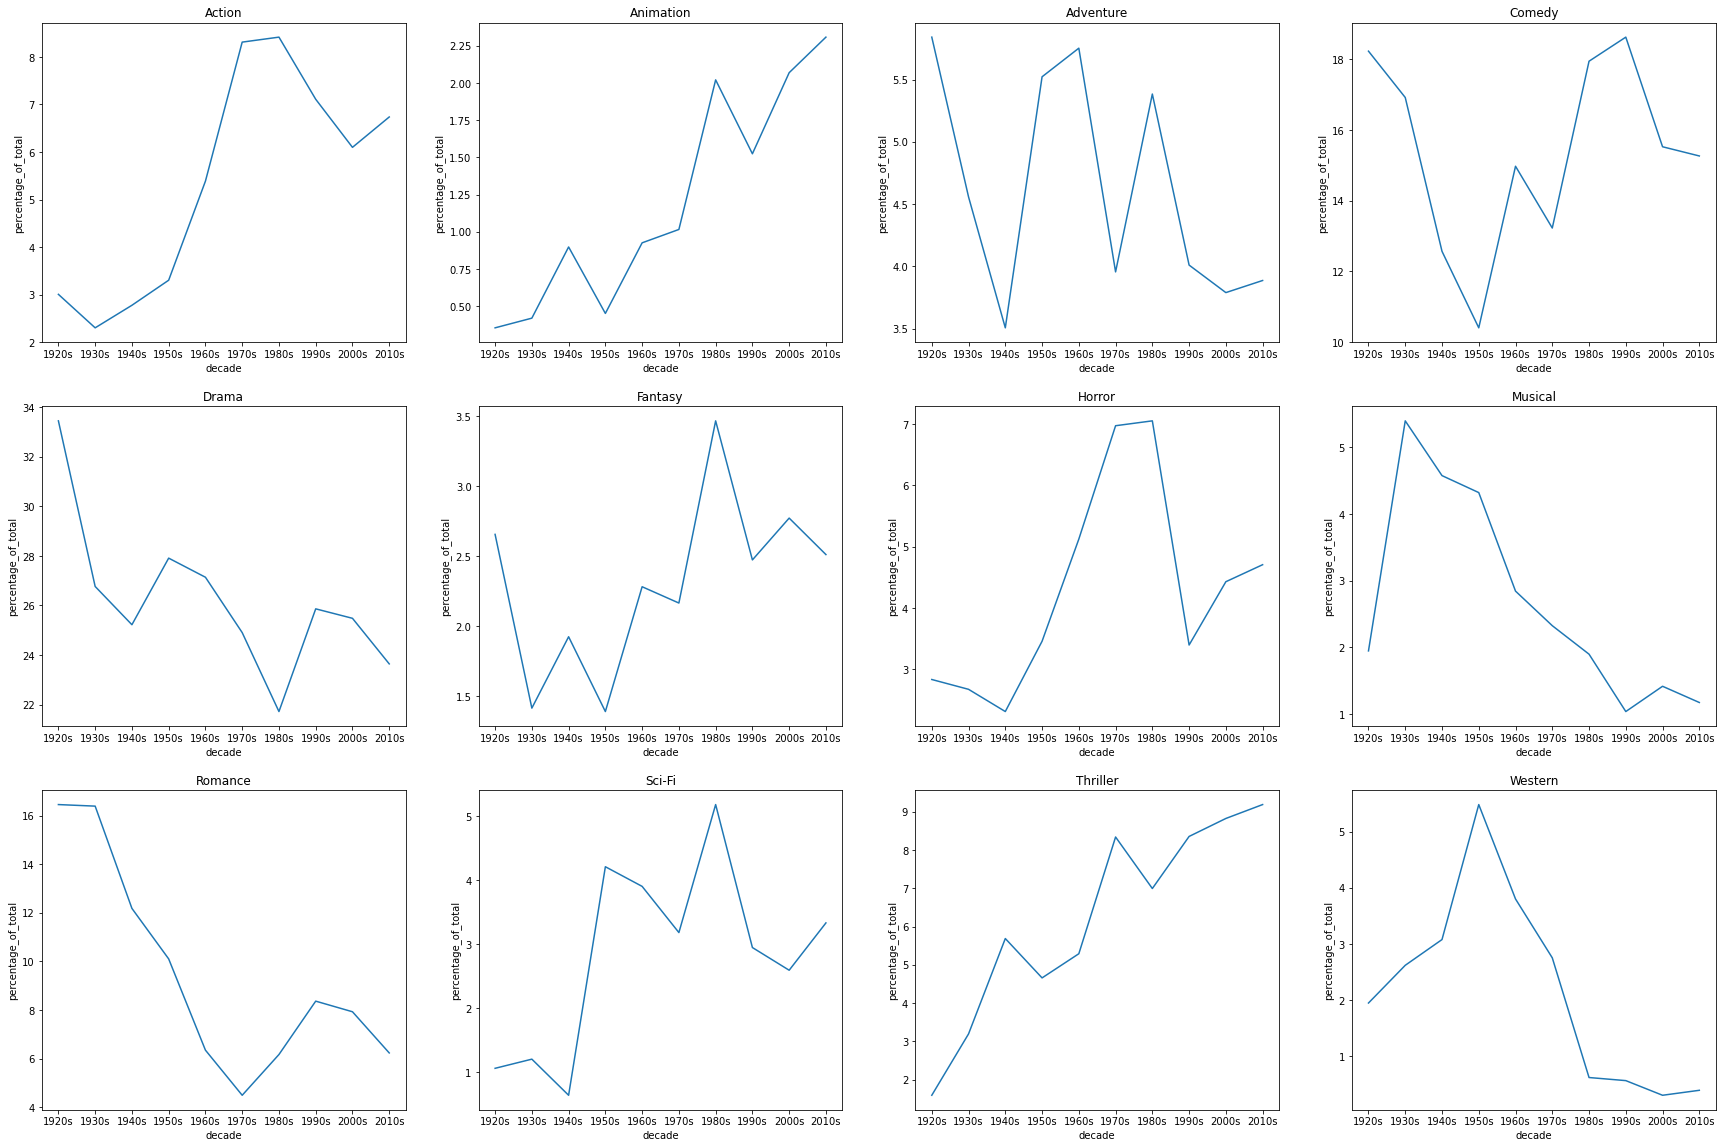

In [ ]:
#Plots to show the percentage of movies that were a specific genre for a specific decade
fig, axes = plt.subplots(3, 4, figsize=(30, 20))

sns.lineplot(ax=axes[0, 0], x = 'decade', y = 'percentage_of_total', data = Action_df )
sns.lineplot(ax=axes[0, 1], x = 'decade', y = 'percentage_of_total', data = Animation_df )
sns.lineplot(ax=axes[0, 2], x = 'decade', y = 'percentage_of_total', data = Adventure_df )
sns.lineplot(ax=axes[0, 3], x = 'decade', y = 'percentage_of_total', data = Comedy_df )
sns.lineplot(ax=axes[1, 0], x = 'decade', y = 'percentage_of_total', data = Drama_df )
sns.lineplot(ax=axes[1, 1], x = 'decade', y = 'percentage_of_total', data = Fantasy_df )
sns.lineplot(ax=axes[1, 2], x = 'decade', y = 'percentage_of_total', data = Horror_df )
sns.lineplot(ax=axes[1, 3], x = 'decade', y = 'percentage_of_total', data = Musical_df )
sns.lineplot(ax=axes[2, 0], x = 'decade', y = 'percentage_of_total', data = Romance_df )
sns.lineplot(ax=axes[2, 1], x = 'decade', y = 'percentage_of_total', data = Sci_Fi_df )
sns.lineplot(ax=axes[2, 2], x = 'decade', y = 'percentage_of_total', data = Thriller_df )
sns.lineplot(ax=axes[2, 3], x = 'decade', y = 'percentage_of_total', data = Western_df  )


axes[0,0].set_title('Action')
axes[0,1].set_title('Animation')
axes[0,2].set_title('Adventure')
axes[0,3].set_title('Comedy')
axes[1,0].set_title('Drama')
axes[1,1].set_title('Fantasy')
axes[1,2].set_title('Horror')
axes[1,3].set_title('Musical')
axes[2,0].set_title('Romance')
axes[2,1].set_title('Sci-Fi')
axes[2,2].set_title('Thriller')
axes[2,3].set_title('Western')

* The plots show for instance in the 1920s, about 16% of all movies for that decade were romance movies
* Above we have a great illustration of different genres by different decades, which is quite valuable information since the streaming company would need to keep up with trends. As we can see action movies have picked up during the last 30 years where Western movies have dropped in the past 30 years.
* It would be wise for them to pick the genres of the highest order that have the highest proportion of votes and funnel those specific movies for top genres to their required clients watching on the platform. In essence, you'd want  to increase viewing time that would lead to an increase in revenue, so why not start with the top 5 genres based on the above graphs.

### Ratings EDA

We start off by aquiring the movieIds of the most highly rated movies in the dataset. These movies, will intuitively, carry reasonably high average ratings.

In [ ]:
#Create EDA df, which involves merging df_movie_imdb_tags with df_train
eda = pd.merge(df_movie_imdb_tags, df_train, on='movieId', how='inner')
eda.drop(['userId', 'tag', 'g_tag', 'budget', 'currency', 'exchange_rate', 'director'], axis=1, inplace=True)

#Group eda df by movieId, title and find the movies with the most amount of ratings
eda_most_rated = pd.DataFrame(eda.groupby(['movieId', 'title'], as_index=False)['timestamp'].count())
eda_most_rated.reset_index(inplace=True)
eda_most_rated = eda_most_rated.sort_values(by='timestamp', ascending=False).head(250)
#Create a list of the most rated movieIds
best250_movieId = list(eda_most_rated.movieId)

#Slicing df for information on the 250 most rated movies
best250 = eda[eda['movieId'].isin(best250_movieId)]

#Group best250 df by movieId, then attain average mean rating for all 250 movies:
best250_mean_rating = best250.groupby('movieId')['rating'].mean().mean()

#Get mean rating for all movies in eda df:
all_mean_rating = eda.groupby('movieId')['rating'].mean().mean()

Ratings of top movies compared to all movies:



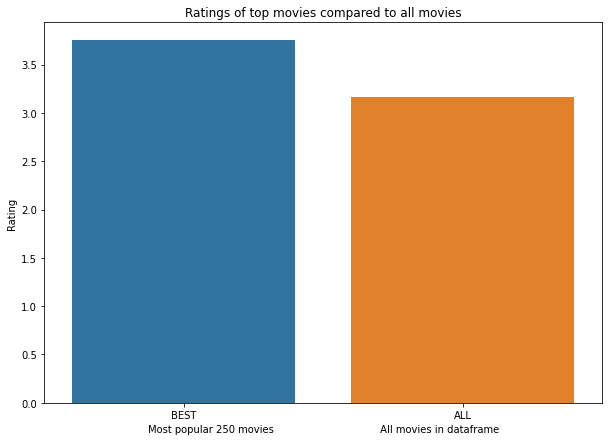

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=['BEST', 'ALL'], y=[best250_mean_rating, all_mean_rating])
plt.title('Ratings of top movies compared to all movies', fontsize=12)
ax.set(ylabel='Rating', xlabel='Most popular 250 movies                                  All movies in dataframe')
plt.show()

The above barplot shows that movies among the top 250 most rated are also on average rated higher than all movies collectively.

AVERAGE REVIEWS FOR TOP MOVIES COMPARED TO ALL MOVIES:

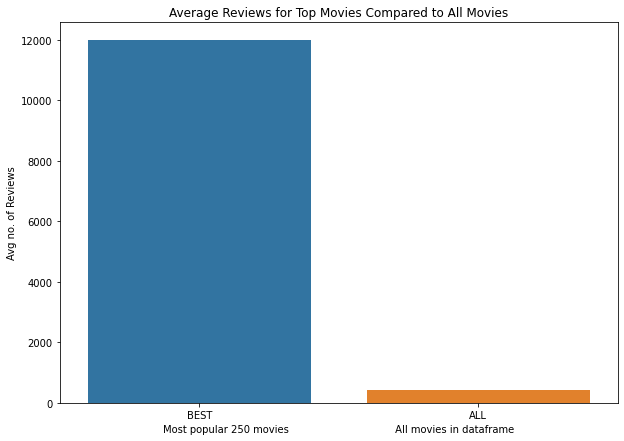

In [ ]:
best250_ratings_count = best250.groupby('movieId')['timestamp'].count().mean()
all_ratings_count = eda.groupby('movieId')['timestamp'].count().mean()

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=['BEST', 'ALL'], y=[best250_ratings_count, all_ratings_count])
ax.set(ylabel='Rating', xlabel='Most popular 250 movies                                  All movies in dataframe')
plt.title("Average Reviews for Top Movies Compared to All Movies", fontsize=12)
plt.ylabel('Avg no. of Reviews')
plt.show()

The barplot above is interesting because it shows a huge discrepancy between the average amount of views among the top 250 most rated movies, as opposed to all movies in the dataset. 
Although this difference is extreme, it is understandable as to why. Many of the top-rated movies have been rated well over 20000 thousand times. So despite not having the highest average ratings, 'classic' movies tend to get watched by millions of people and therefore are rated more frequently. 

How does the budget of the top movies compare to the all of the movies:

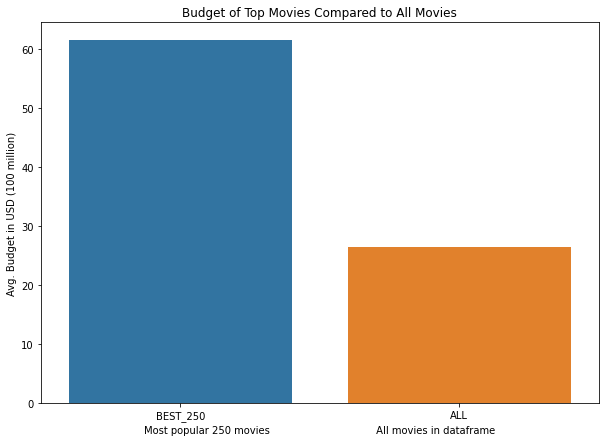

In [ ]:
best250_avg_budget = best250.groupby('movieId')['budget_USD'].mean().div(1000000).mean()
all_avg_budget = eda.groupby('movieId')['budget_USD'].mean().div(1000000).mean()

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=['BEST_250', 'ALL'], y=[best250_avg_budget, all_avg_budget])
plt.title("Budget of Top Movies Compared to All Movies", fontsize=12)
ax.set(ylabel='Rating', xlabel='Most popular 250 movies                                  All movies in dataframe')
plt.ylabel("Avg. Budget in USD (100 million)")
plt.show()

The data in the above plot is to be expected. However, it was important to check nonetheless. There are a myriad of factors in producing a movie that is more popular and of a higher quality that would require the movie producer's to be operating with a higher budget.

Has average budgets for the top movies changed over time?

---




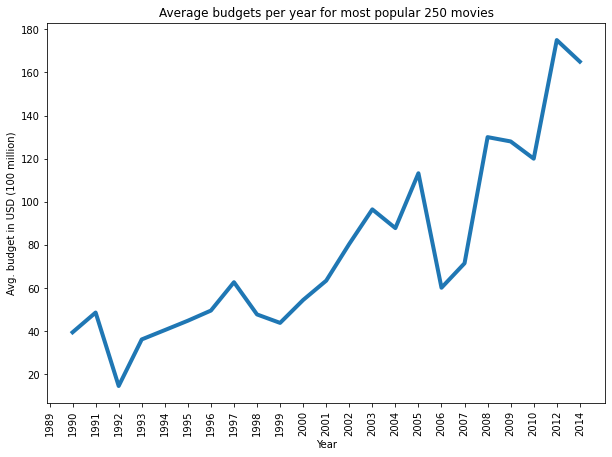

In [ ]:
#Grouping best250 df by year, and thus finding average budget per year.
best250_budget = pd.DataFrame(best250.groupby(['movieId', 'year'], as_index=False)['budget_USD'].mean())
best250_budget_per_year = pd.DataFrame(best250_budget.groupby('year', as_index=False)['budget_USD'].mean())
best250_budget_per_year['budget_USD'] = best250_budget_per_year['budget_USD'].div(1000000)
best250_budget_per_year.sort_values(by='year', inplace=True)
best250_budget_per_year

plt.figure(figsize=(10, 7))
sns.lineplot(x='year', y='budget_USD', data=best250_budget_per_year, linewidth=4)
plt.title("Average budgets per year for most popular 250 movies", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Avg. budget in USD (100 million)")
plt.show()

Aside from a few outlier years, such as 1999 and 2006, there is a general trend upwards. It is also important to note that this is the average budget spend per movie in each year that a top 250 movie was released. So, the data point for a given year could be severely affected by any outlier movie budgets in that year or a small sample size of movies produced in that year.

Assesing ratings data for movies based on the year that those movies were released

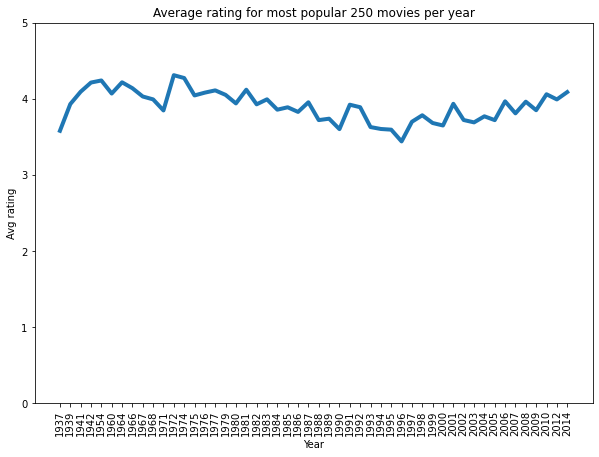

In [ ]:
#Group best250 df by year and find average rating per year
best250_rating = pd.DataFrame(best250.groupby(['movieId', 'year'], as_index=False)['rating'].mean())
best250_ratings_per_year = pd.DataFrame(best250_rating.groupby('year', as_index=False)['rating'].mean())
best250_ratings_per_year.sort_values(by='year', inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(x='year', y='rating', data=best250_ratings_per_year, linewidth=4)
plt.title("Average rating for most popular 250 movies per year", fontsize=12)
plt.ylim(ymax=5, ymin=0)
plt.xlabel("Year")
plt.ylabel("Avg rating")
plt.xticks(rotation=90)
plt.show()

The average ratings for movies, according to the year of their releases, appears to have not varied significantly over time. This illustrates that the most popular 250 movies tend to be rated quite consistently. 

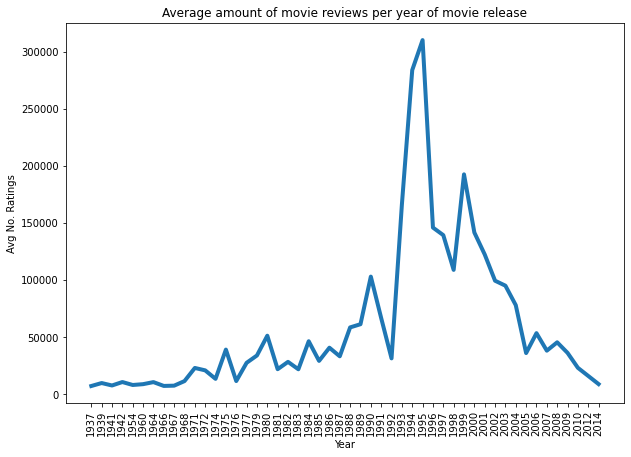

In [ ]:
#Attaining the average number of ratings made per year that a top 250 movie was released.
best250_rating_count = pd.DataFrame(best250.groupby(['movieId', 'year'], as_index=False)['rating'].count())
best250_rating_count_per_year = pd.DataFrame(best250_rating_count.groupby('year', as_index=False)['rating'].sum())
best250_rating_count_per_year.sort_values(by='year', inplace=True)
best250_rating_count_per_year

plt.figure(figsize=(10, 7))
sns.lineplot(x='year', y='rating', data=best250_rating_count_per_year, linewidth=4)
plt.title("Average amount of movie reviews per year of movie release", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Avg No. Ratings")
plt.xticks(rotation=90)
plt.show()

There is a definite peak in the average number of ratings made in the early to mid-1990s. There was also a period in the late 1980s and late 1990s/early 2000s when the average amount of ratings appeared to go up. 
This is perhaps significant of an era in which many movies were released that have developed into classics. This is also probably linked to there having been more time for more people to have watched these movies and rated them.

This line plot is important because it means that movie recommendation systems built from this IMDB and ratings data will likely return recommendations to movies made between the late 1980s to early 2000s.

Looking at genre data from the top movies:

---



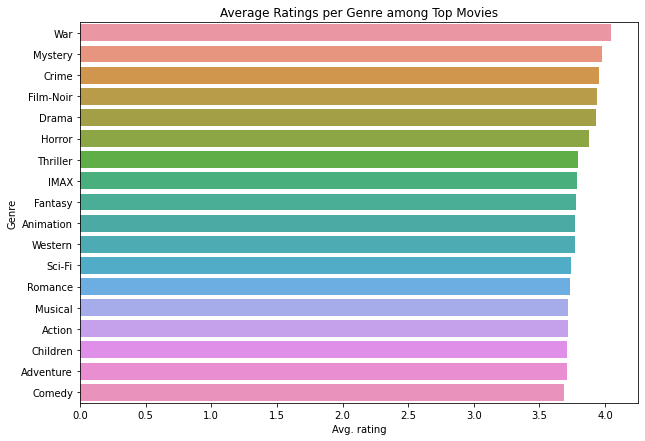

In [ ]:
#In addition to genres data, we wish to analyse the average ratings associated with each genre
genres = pd.merge(movies_genres, df_train, on='movieId', how='inner')
best250_genres = genres[genres['movieId'].isin(best250_movieId)]
best250_genres_rating = pd.DataFrame(best250_genres.groupby('genres', as_index=False)['rating'].mean())
best250_genres_rating.sort_values(by='rating', ascending=False, inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(x='rating', y='genres', data=best250_genres_rating)
plt.title("Average Ratings per Genre among Top Movies", fontsize=12)
plt.xlabel("Avg. rating")
plt.ylabel("Genre")
plt.show()

The average ratings data per genre in the above plot appears to not signficantly vary. Interestingly, Film-Noir and War have slightly higher average ratings that one might expect. This may be down to these genres having many 5 star ratings among their relatively few number of reviews when compared to a very common genre such as Drama.

Average amount of ratings for each genre



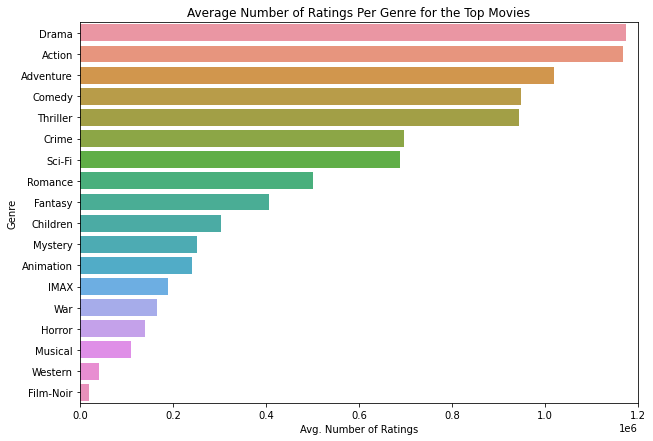

In [ ]:
#Analysing amount of reviews per genre among best 250 movies
best250_genres_ratings_amount = pd.DataFrame(best250_genres.groupby('genres', as_index=False)['rating'].count())
best250_genres_ratings_amount['rating'] = best250_genres_ratings_amount['rating']
best250_genres_ratings_amount.sort_values(by='rating', ascending=False, inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(x='rating', y='genres', data=best250_genres_ratings_amount)
plt.xlim(xmin=0, xmax=1200000)
plt.title("Average Number of Ratings Per Genre for the Top Movies", fontsize=12)
plt.xlabel("Avg. Number of Ratings")
plt.ylabel("Genre")
plt.show()

The above plot reinforces the point made about the average ratings per genre bar plot: and that is that certain genres carrying a high average rating may well be down to that genre not being reviewed as often as the most popular genres.
However, it is to be expected that Drama, Comedy, Thriller, Adventure and Action are among the most rated genres. 

# 5: Modeling

Before we start we, will first look at our data and remove any unnecessary columns and select a subset of the data to train, for better and more efficient computation time. We will then take our best model and make our predictions on the full test set.



In [ ]:
# Load our train data set
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
# We will not need timestamp to make our predictions.
df_train.drop('timestamp', axis=1, inplace=True)

In [ ]:
df_train.head(1)

,userId,movieId,rating
0,5163,57669,4.0


In [ ]:
# We can see there is 10 million entries so let's use only a subset of 300k
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 228.9 MB


In [ ]:
train_subset = df_train[:300000]
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   300000 non-null  int64  
 1   movieId  300000 non-null  int64  
 2   rating   300000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.9 MB


## Two model filtering methods

<img src="https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/data-science-movie-recommendation-project.jpg" alt="Machine Learning Project - Data Science Movie Recommendation System Project  in R - DataFlair" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="width: 433px; height: 226.758px; margin: 18.7709px 0px;">

## Content Based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback, also taking into account specific features of the different movies.

The model should recommend items relevant to this user. To do so, you must first pick a similarity metric (for example, dot product). Then, you must set up the system to score each candidate item according to this similarity metric. Note that the recommendations are specific to this user, as the model did not use any information about other users.

In [ ]:
#Now we select the features to be used and we combine the features
def combine_features(row):
 return row['title_cast'] + ' ' + row['director'] + ' ' + row['plot_keywords']+ ' ' + row['genres'] + ' ' + row['g_tag'] + ' ' + row['tag'] + ' ' + row['decade']

#Make new column with combined features
df_movie_imdb_tags['combined_features'] = df_movie_imdb_tags.apply(combine_features,axis=1)

In [ ]:
df_movie_imdb_tags = df_movie_imdb_tags[['movieId','combined_features','title']]

In [ ]:
# Convienient indexes to map between book titles and indexes of 
# the movies dataframe
titles = df_movie_imdb_tags['title']
indices = pd.Series(df_movie_imdb_tags.index, index=df_movie_imdb_tags['title'])

tf = TfidfVectorizer(min_df = 10)

# Produce a feature matrix, where each row corresponds to a movie,
# with TF-IDF features as columns 
tf_comb_matrix = tf.fit_transform(df_movie_imdb_tags['combined_features'])

In [ ]:
#As long as this is smaller than 35 000 x 35 000 it will fit into ram when doing the similarity matrix
tf_comb_matrix.shape

(24866, 9210)

In [ ]:
#Make cosine similarity matrix
cosine_sim_comb = cosine_similarity(tf_comb_matrix,tf_comb_matrix)

In [ ]:
cosine_sim_comb.shape

(24866, 24866)

In [ ]:
cosine_sim_comb[:5]

array([[1.        , 0.04469754, 0.01403807, ..., 0.00408343, 0.01877647,
        0.01189912],
       [0.04469754, 1.        , 0.00170673, ..., 0.00488793, 0.        ,
        0.05187166],
       [0.01403807, 0.00170673, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00279541, 0.00173373, 0.01881446, ..., 0.        , 0.        ,
        0.        ],
       [0.02460215, 0.03587836, 0.08482861, ..., 0.        , 0.        ,
        0.01118797]])

In [ ]:
def content_generate_top_N_recommendations_list(movie_title, N=10):
    N = N+1
    # Place 'The' at the end
    if movie_title.startswith('The'):
      movie_title = movie_title[4:-7] + ', The ' + movie_title[-6:]
    
    # Convert the string movie title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_comb[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    movies = list(titles.iloc[movie_indices].values)

    # Return list of top 10 movies with "The" at the start of the movie title
    fixed_list = []
    for movie in movies:
      if movie[:-7].endswith('The'):
        fixed_list.append('The ' + movie[:-12] + ' ' + movie[-6:])
      elif movie[:-7].endswith('A'):
        fixed_list.append('A ' + movie[:-10] + ' ' + movie[-6:])
      else:
        fixed_list.append(movie)
    
    return(fixed_list[:N])

In [ ]:
content_generate_top_N_recommendations_list("Toy Story (1995)", N=10)

['Toy Story 2 (1999)',
 "A Bug's Life (1998)",
 'Toy Story 3 (2010)',
 'Monsters, Inc. (2001)',
 'Finding Nemo (2003)',
 'Monsters University (2013)',
 'The Incredibles (2004)',
 'Ice Age (2002)',
 'Cars (2006)',
 'Up (2009)']

In [ ]:
###---------Veshen-------------####
list1 = content_generate_top_N_recommendations_list("Toy Story (1995)", N=10)
list2 = content_generate_top_N_recommendations_list("Sphere (1998)", N=10)
list3 = content_generate_top_N_recommendations_list("The Shawshank Redemption (1994)", N=10)

new_list = list1[:4]+list2[:3]+list3[:3]
new_list

['Toy Story 2 (1999)',
 "A Bug's Life (1998)",
 'Toy Story 3 (2010)',
 'Monsters, Inc. (2001)',
 'The Andromeda Strain (1971)',
 'The Terminal Man (1974)',
 'Hello Down There (1969)',
 'Dreamcatcher (2003)',
 '10 Items or Less (2006)',
 'The Bucket List (2007)']

## Collaborative Filtering
Collaborative filtering uses similarities between users and items simultaneously to provide recommendations. It allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B.

We will make use of a few matrix factorization based algorithms.



####Algorithm 1: Singular Value Decomposition (SVD)
We will use the Surprise library that uses extremely powerful algorithms like Singular Value Decomposition (SVD) to minimize the RMSE (Root Mean Square Error) and give great recommendations.

The Singular Value Decomposition algorithm is a matrix factorization technique that reduces the number of features of a dataset. In the matrix structure, each row represents a user and each column represents a movie. The matrix elements are ratings that are given to movies by users.

In [ ]:
algo = SVD()

In [ ]:
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))

In [ ]:
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)

#### Cross Validation

In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9460  0.9399  0.9432  0.9437  0.9434  0.9433  0.0020  
MAE (testset)     0.7337  0.7274  0.7274  0.7293  0.7283  0.7292  0.0024  
Fit time          15.63   15.97   15.79   15.69   15.71   15.76   0.12    
Test time         0.74    0.51    0.80    0.67    0.72    0.69    0.10    


{'fit_time': (15.634863376617432,
  15.969153642654419,
  15.793761014938354,
  15.694197177886963,
  15.713818073272705),
 'test_mae': array([0.73374588, 0.72737504, 0.72735983, 0.72930052, 0.72831829]),
 'test_rmse': array([0.94604806, 0.9398957 , 0.94324688, 0.94368893, 0.9434131 ]),
 'test_time': (0.7384886741638184,
  0.5144314765930176,
  0.8015553951263428,
  0.6711440086364746,
  0.7213904857635498)}

In [ ]:
# Check our predictions with this model on subset data
trainset = data.build_full_trainset()
algo.fit(trainset)

In [ ]:
# Let us pick user with user Id 5 and check the ratings she/he has given.
df_train[df_train['userId'] == 5]

,userId,movieId,rating
461943,5,216,4.0
788921,5,47,5.0
1028856,5,219,3.0
1148969,5,432,3.0
1282877,5,784,2.0
1365749,5,312,3.0
1500199,5,340,5.0
2058322,5,1265,4.0
2134953,5,1047,3.0
2212756,5,1,4.0


In [ ]:
algo.predict(5, 1, 3)

Prediction(uid=5, iid=1, r_ui=3, est=3.8720985599186593, details={'was_impossible': False})

For movie with ID = 5, we get an estimated prediction of 3.87 which is rounded to 4 in the list above. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

#### Train-Test-Split

In [ ]:
# Test sample is made of 25% of the subset data
trainset, testset = train_test_split(data, test_size=0.10, random_state=42)

In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
svd_pred = algo.test(testset)

# Compute RMSE
svd_rmse = accuracy.rmse(svd_pred)

RMSE: 0.9404


### Algorithm 2: SVD pp 



In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
svd_pp = SVDpp()
svd_pp.fit(trainset)
svd_pp_pred = svd_pp.test(testset)

# Compute RMSE
svd_pp_rmse = accuracy.rmse(svd_pp_pred)

RMSE: 0.9344


### Algorithm 3: Non-negative Matrix(NMF)

NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.


In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
nmf = NMF()
nmf.fit(trainset)
nmf_pred = nmf.test(testset)

# Compute RMSE
nmf_rmse = accuracy.rmse(nmf_pred)

RMSE: 1.1048


### Algorithm 4: Slope One

The SlopeOne algorithm is a simple yet accurate collaborative filtering algorithm that uses a simple linear regression model to solve the data sparisity problem. 

In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
slp_one = SlopeOne()
slp_one.fit(trainset)
slp_one_pred = slp_one.test(testset)

# Compute RMSE
slp_rmse = accuracy.rmse(slp_one_pred)

RMSE: 1.2039


### Algorithm 5: Co-clustering
The Co-clustering algorithm assigns clusters using a straightforward optimization method, much like k-means.

In [ ]:
# Train the algorithm on the trainset, and predict ratings for the testset
ccl = CoClustering()
ccl.fit(trainset)
ccl_pred = ccl.test(testset)

# Compute RMSE
ccl_rmse = accuracy.rmse(ccl_pred)

RMSE: 1.0802


### Now let's pickle all our default models so that we can use it in our app.

In [ ]:
#Save the model as pickle file
pickle.dump(svd_pred, open('svd.pkl','wb'))
pickle.dump(svd_pp_pred, open('svd_pp.pkl','wb'))
pickle.dump(nmf_pred, open('nmf.pkl','wb'))
pickle.dump(slp_one_pred, open('slp_one.pkl','wb'))
pickle.dump(ccl_pred, open('ccl.pkl','wb'))

### Now we make a Collaborative recommender function that predicts top 10 movies based on our best SVD model.

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/ColabNotebooks/best_svd.pkl', 'rb'))

In [ ]:
def collab_model(movie_list, top_n=10):
    
    movie_id1 = df_movies.loc[df_movies["title"].isin(movie_list), "movieId"].iloc[0]

    user_IDs = (df_train[df_train['movieId']==movie_id1].sort_values(by = 'rating', ascending = False)).userId[:50].values

    combo_df = df_test[df_test['userId'].isin(user_IDs)]

    predict_colb = []
    for i, row in combo_df.iterrows():
       x = (loaded_model.predict(row.userId, row.movieId))
       pred_colab = x[3]
       predict_colb.append(pred_colab)

    results = pd.DataFrame({"userId":combo_df['userId'],"movieId":combo_df['movieId'],"rating": predict_colb})
    results = results.sort_values(by = 'rating', ascending= False)
    results = pd.merge(results, df_movies, on='movieId', how = 'left')

    colab_list = list(results.title[:100])

    top_10 = list(dict.fromkeys(colab_list))

    return top_10[:10]

In [ ]:
movie_list = ['Toy Story (1995)', 'Alien (1979)' , 'Terminator 2 (1993)']

In [ ]:
collab_model(movie_list, top_n=10)

['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'American Beauty (1999)',
 'Spirited Away (Sen to Chihiro no kamikakushi) (2001)',
 'Song of the Little Road (Pather Panchali) (1955)',
 'General, The (1926)',
 'Thin Blue Line, The (1988)',
 'Dark Knight, The (2008)',
 'Fight Club (1999)',
 'Duck Soup (1933)',
 'Cabin in the Woods, The (2012)']

Great recommendations just based on using our ratings data.

## Hybrid Filtering (Combination of Content and Collaborative)

A simple hybrid movie recommender system is described that
combines content based and collaborative modelling and provides an explanation for increased user acceptance, while using the best of both worlds to predict a given movie recommendation. The system uses rating data from the IMDB database. In order to provide the user with insight into the reasoning behind
a recommendation.

In [ ]:
def hybrid(movie_title, userId):
    # Convert the string movie title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_comb[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:100]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    answer = titles.iloc[movie_indices].values

    pickle_model = pickle.load(open('/content/drive/My Drive/ColabNotebooks/best_svd.pkl', 'rb'))

    sim_movie_ids = list(df_movies[df_movies['title'].isin(answer)].movieId.values)
    test_df = {'userId': [userId]*len(sim_movie_ids), 'movieId': sim_movie_ids}
    test_df = pd.DataFrame(data=test_df)

    predictions1 = []
    for i, row in test_df.iterrows():
        x = (pickle_model.predict(row.userId, row.movieId))
        pred = x[3]
        predictions1.append(pred)

    result = pd.DataFrame({"userId":test_df['userId'],"movieId":test_df['movieId'],"rating": predictions1})

    result = pd.merge(result, df_movies[['movieId','title']], how='left', on='movieId')
   
    result = result[['userId','movieId','title','rating']]
    result = result.sort_values(by = 'rating', ascending=False).head(10)

    return result

In [ ]:
# Displaying a list of top 10 movie recommendations
hybrid('Toy Story (1995)',314)

,userId,movieId,title,rating
81,314,108983,La Luna (2011),4.403400
75,314,95858,For the Birds (2000),4.379522
71,314,95311,Presto (2008),4.333934
56,314,68954,Up (2009),4.333924
78,314,106011,"Blue Umbrella, The (2013)",4.329404
88,314,115617,Big Hero 6 (2014),4.327889
52,314,60069,WALL·E (2008),4.325354
39,314,4886,"Monsters, Inc. (2001)",4.241879
58,314,72356,Partly Cloudy (2009),4.229131
73,314,95654,Geri's Game (1997),4.214285


# 6: Performance Evaluation

Here we can evaluate the RMSE's of the models.

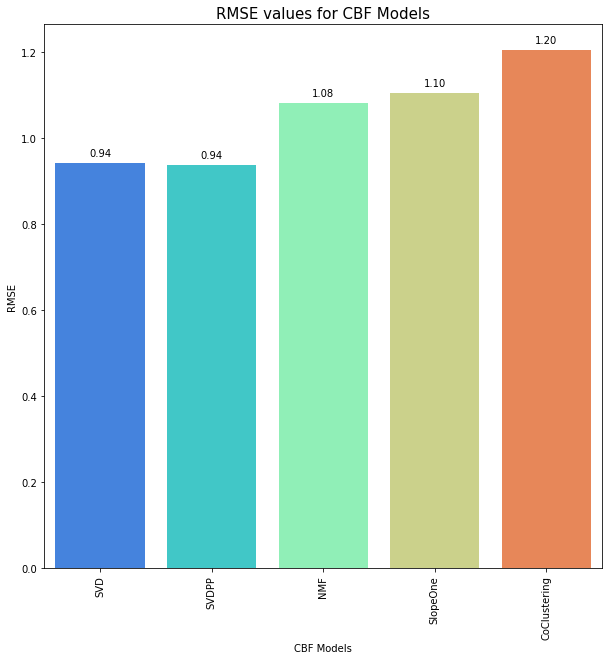

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(10, 10))

model_names = ['SVD','SVDPP','NMF','SlopeOne','CoClustering']
rmse_vals = [svd_rmse, svd_pp_rmse, ccl_rmse, nmf_rmse, slp_rmse]

ax = sns.barplot(x=model_names, y=rmse_vals, palette='rainbow')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('RMSE values for CBF Models', fontsize=15)
plt.xticks(rotation=90)

plt.xlabel('CBF Models') 
plt.ylabel('RMSE')

plt.show()

As we can see our SVD model gave the best RMSE output. On the graph SVDpp looks the same but narrowing it down to 4 decimals SVD takes the crown. 

# 7: Best Model Hyperparameter Tuning

### Hyperparameter Tuning 

Hyperparameter tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process. We tested multiple parameters for our best performing model (i.e. **SVD**).

In [ ]:
# Do not run this cell it takes +- 5 hours to run
# Setting our parameters and gridsearching for optimal results
param_grid = {'n_epochs':[20,30,40,50], 
              'n_factors':[100,200,300,400], 
              'init_std_dev':[0.001,0.005,0.05,0,1], 
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('Best score:')
print(grid_SVD.best_score['rmse'])
print('Best parameters:')
print(grid_SVD.best_params['rmse'])

***Best score:***
0.9298329547613298
***Best parameters:***
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


In [ ]:
# Train our best parameters on our subset data.
svd_test = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)

# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9240


# 8: Submission

Our submissions have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We created a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. 

In [ ]:
# Train best model on whole train dataset (10 million entries)
reader1 = Reader(rating_scale = (df_train['rating'].min(), df_train['rating'].max()))
data1 = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader1)
trainset1 = data1.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset1)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


In [ ]:
#Save the model as pickle file
pickle.dump(svd, open('best_svd.pkl','wb'))

In [ ]:
#Load pickle model back in
loaded_model = pickle.load(open('best_svd.pkl', 'rb'))

### Test our pickled best model to see if it works.

In [ ]:
#test on small subset of test data to see if pickle model is loaded correct
test_subset = df_test[:1000]
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   userId   1000 non-null   int64
 1   movieId  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [ ]:
predictions1 = []
for i, row in test_subset.iterrows():
    x = (loaded_model.predict(row.userId, row.movieId))
    pred = x[3]
    predictions1.append(pred)

test_subset['Id'] = test_subset['userId'].map(str) +'_'+ test_subset['movieId'].map(str)

result = pd.DataFrame({"Id":test_subset['Id'],"rating": predictions1})
result.head()

,Id,rating
0,1_2011,3.063302
1,1_4144,4.186689
2,1_5767,3.769391
3,1_6711,4.125384
4,1_7318,2.980803


### Above we can see that our pickled best model works. Now we can make our predicitons on our unseen data and export our csv file.

In [ ]:
# Create Kaggle submission file
# Make a predictions list that runs our model on our unseen data
predictions = []
for i, row in df_test.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
    
# Concatenate the userId and movieId column into one column, named 'Id' 
df_test['Id'] = df_test['userId'].map(str) +'_'+ df_test['movieId'].map(str)

In [ ]:
# Converting our results in a dataframe format 
results = pd.DataFrame({"Id":df_test['Id'],"rating": predictions})
results.head()

In [ ]:
# Exporting our csv submission file
results.to_csv("Team_ZM3_SVD_2.csv", index=False)

## Close Comet Experiment

In [ ]:
'''experiment.end()

# 9: Conclusion

#### '*Success* is not final; *failure* is not fatal: it is the *courage* to continue that counts.' quote by Winston Churchill 
----

- Building a movie recommender system is not as simple as it seems. We have managed to build 3 great movie recommenders. 

- As seen in the output cells above in this notebook. We have concluded several points:
     - Looking at the top 250 movies of the data it is safe to say that it would be adviseable of the streaming company to consider our EDA graph conclusions when they make use of our recommender system.  
     - Our filtering models have predicted very accurately based on rating predictions as seen in the train test and split section.
     - We can say that by focusing on the correct genres, the current trend, the best directors with cast and the correct model. The company will surely have a better perspective on how to narrow down what their users want to watch, which will lead to more viewer time and that leads to increase in revenue.
     - By identifying the top directors, the streaming company can set in motion more partnerships with those specific directors to get more traction on the platform and make sure the best movies are accessible to more people.
     - For content based filtering using as many features as possible, which include; director, cast, decade, tags, genome tags, plot keywords and genres give the best recommendations.

- We believe our recommender system will lure more people to the platform since it is predicting so accurately which in essence would drive view time through the roof.
